<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [1]:
#Start Here

import pandas as pd

PATH = "/Users/ekselan/Desktop/LAMBDA/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv"
reviews = pd.read_csv(PATH)
print(reviews.shape)
reviews.head()

(28332, 24)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [4]:
df = reviews.copy()
df['brand'] = df['brand'].apply(lambda x: x.lower())
df['brand'].value_counts()

amazon          16153
amazonbasics    12179
Name: brand, dtype: int64

In [6]:
df['reviews.text'][100]

"As a teacher, I need tons of batteries, but I refused to spend excessive amounts on them, so I figured this was the best option! They are long-lasting, worth the money, cute (if that even matters, lol)! You won't find a deal like this in stores!I highly recommend!"

## Tokenization

In [7]:
import spacy

nlp = spacy.load("en_core_web_lg")

In [90]:
samp = df.sample(100)

In [89]:
# Add stop words

STOP_WORDS = nlp.Defaults.stop_words.union(["Amazon",
                                            "Christmas",
                                            "Kindle",
                                            "fire",
                                            "tablet",
                                            "device",
                                            "battery",
                                            "Fire"])

In [95]:
## Use Lemmas as our tokens

tokens = []

for doc in nlp.pipe(df['reviews.text']):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False) & (token.pos != 'PRON') & (token not in STOP_WORDS):
            doc_tokens.append(token.lemma_.strip())
            
    tokens.append(doc_tokens)

In [96]:
# Confirmation that shape is correct

len(tokens) == df.shape[0]

True

## Gensim LDA Topic Modeling

In [98]:
import gensim

from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore

In [99]:
id2word = corpora.Dictionary(tokens)

In [100]:
len(id2word.keys())

9727

In [101]:
id2word.filter_extremes(no_below=5, no_above=.95)

In [102]:
len(id2word.keys())

3087

In [103]:
corpora = [id2word.doc2bow(doc) for doc in tokens]

In [104]:
lda = LdaMulticore(corpus=corpora, # stream of document vectors
                   id2word=id2word, # mapping from IDs to words, used to determine vocab size
                   num_topics=15, # n_requested latent topics to be extracted from training corpus
                   passes=100,
                   workers=5) # If none, all avail cores are used. Optimal:set to real n of cores -1




In [105]:
lda.print_topics()

[(0,
  '0.065*"tablet" + 0.039*"Amazon" + 0.024*"app" + 0.019*"Fire" + 0.016*"$" + 0.016*"price" + 0.015*"good" + 0.012*"buy" + 0.012*"work" + 0.011*"iPad"'),
 (1,
  '0.105*"product" + 0.069*"excellent" + 0.051*"good" + 0.040*"user" + 0.039*"time" + 0.027*"friendly" + 0.020*"buy" + 0.016*"exactly" + 0.016*"need" + 0.015*"describe"'),
 (2,
  '0.156*"battery" + 0.058*"long" + 0.057*"brand" + 0.030*"buy" + 0.025*"good" + 0.023*"price" + 0.020*"work" + 0.019*"cheap" + 0.017*"life" + 0.015*"time"'),
 (3,
  '0.212*"great" + 0.153*"price" + 0.141*"good" + 0.097*"work" + 0.051*"battery" + 0.037*"value" + 0.033*"quality" + 0.030*"deal" + 0.027*"product" + 0.019*"far"'),
 (4,
  '0.136*"old" + 0.123*"year" + 0.050*"love" + 0.041*"buy" + 0.036*"2" + 0.029*"3" + 0.024*"tablet" + 0.022*"5" + 0.021*"4" + 0.020*"get"'),
 (5,
  '0.069*"battery" + 0.022*"charge" + 0.020*"work" + 0.017*"use" + 0.015*"day" + 0.013*"week" + 0.012*"buy" + 0.012*"remote" + 0.011*"time" + 0.011*"month"'),
 (6,
  '0.153*"table

In [106]:
import re
words = [re.findall('"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t[0:5]) for t in words]

In [108]:
for id, t in enumerate(topics):
    print(f"-----Topic {id} -----")
    print(t, end="\n\n")

-----Topic 0 -----
tablet Amazon app Fire $

-----Topic 1 -----
product excellent good user time

-----Topic 2 -----
battery long brand buy good

-----Topic 3 -----
great price good work battery

-----Topic 4 -----
old year love buy 2

-----Topic 5 -----
battery charge work use day

-----Topic 6 -----
tablet kid great good perfect

-----Topic 7 -----
Amazon come box thank package

-----Topic 8 -----
tablet use great storage internet

-----Topic 9 -----
gift love great buy recommend

-----Topic 10 -----
read book light easy Kindle

-----Topic 11 -----
kindle Kindle love fire new

-----Topic 12 -----
game kid app play great

-----Topic 13 -----
device sound screen Amazon speaker

-----Topic 14 -----
use love easy tablet buy



## Interpret LDA Results

In [109]:
# Topic Distance Visualization

import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [110]:
pyLDAvis.gensim.prepare(lda, corpora, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.247943 -0.005761       1        1  11.970416
5     -0.148115 -0.087153       2        1  10.417922
12     0.159268 -0.031917       3        1   9.035160
0     -0.049578 -0.108452       4        1   8.295311
3     -0.272378  0.224829       5        1   7.595780
10     0.089910 -0.154934       6        1   6.739933
13    -0.038794 -0.240241       7        1   6.605788
14     0.247180  0.038062       8        1   6.228814
4      0.193045  0.084073       9        1   5.824438
6      0.032520  0.010283      10        1   5.484197
11     0.125638  0.004410      11        1   5.362784
9      0.092815  0.293484      12        1   4.415195
7     -0.126177 -0.126102      13        1   4.328926
8      0.057113 -0.041227      14        1   4.309703
1     -0.114504  0.140645      15        1   3.385622, topic_info=          Term         Freq        Total Category  logprob  loglift
3      battery  9456.000000  9456.000000  Default  30.0000  30.0000
21       great  8867.000000  8867.000000  Default  29.0000  29.0000
18       price  4991.000000  4991.000000  Default  28.0000  28.0000
2072    tablet  7351.000000  7351.000000  Default  27.0000  27.0000
84        love  6118.000000  6118.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
930    overall    81.192993   372.326111  Topic15  -4.8855   1.8627
37    purchase   133.520813  2549.063965  Topic15  -4.3880   0.4364
806       free    71.584763   627.647949  Topic15  -5.0114   1.2145
8      quality    71.515381  1302.877075  Topic15  -5.0124   0.4832
4         item    65.655647   640.444702  Topic15  -5.0979   1.1079

[1024 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
2398      4  0.968444       $
2398      6  0.029693       $
376       2  0.302859       1
376       4  0.106410       1
376       9  0.503400       1
...     ...       ...     ...
1086      9  0.994592      yr
2663      3  0.094501     yrs
2663     12  0.850505     yrs
2310     13  0.914759  zipper
3002     15  0.888708       ©

[2103 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 6, 13, 1, 4, 11, 14, 15, 5, 7, 12, 10, 8, 9, 2])

In [115]:
# What are the documents about?
# Eqv. to '.predict' in sklearn
# Scoring the topic distribution of a single document

lda[corpora[0]]

[(5, 0.92218035)]

In [122]:
### type(lda) #> gensim LdaMulticore instance
### type(lda[corpora]) #> TransformedCorpus
### type(lda[corpora][0]) #> List

list

In [123]:
distro = [lda[d] for d in corpora] #> score all docs in corpus

In [125]:
def update(doc):
    d_dist = {k:0 for k in range (0,15)}
    for t in doc:
        d_dist[t[0]] = t[1]
    return d_dist

new_distro = [update(d) for d in distro]

In [127]:
doc_topics = pd.DataFrame.from_records(new_distro)
doc_topics.columns = topics

In [128]:
doc_topics.head()

,tablet Amazon app Fire $,product excellent good user time,battery long brand buy good,great price good work battery,old year love buy 2,battery charge work use day,tablet kid great good perfect,Amazon come box thank package,tablet use great storage internet,gift love great buy recommend,read book light easy Kindle,kindle Kindle love fire new,game kid app play great,device sound screen Amazon speaker,use love easy tablet buy
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.922180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.011111,0.177780,0.677772,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111
2,0.016667,0.016667,0.322898,0.210443,0.016667,0.016667,0.016667,0.016667,0.016667,0.266656,0.016667,0.016667,0.016667,0.016667,0.016667
3,0.011111,0.011111,0.619844,0.235711,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111
4,0.011111,0.011111,0.520895,0.334660,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111


In [129]:
doc_topics['primary_topic'] = doc_topics.idxmax(axis=1)

In [130]:
doc_topics['primary_topic'].value_counts() #> getting idea of most important topics

great price good work battery         4752
battery long brand buy good           4440
game kid app play great               2421
battery charge work use day           2155
use love easy tablet buy              2125
tablet Amazon app Fire $              1668
tablet kid great good perfect         1639
read book light easy Kindle           1530
gift love great buy recommend         1381
old year love buy 2                   1347
kindle Kindle love fire new           1248
device sound screen Amazon speaker     995
tablet use great storage internet      993
product excellent good user time       857
Amazon come box thank package          781
Name: primary_topic, dtype: int64

## Selecting the Number of Topics

In [131]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute u_mass coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=12)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

In [132]:
# Can take a long time to run.
coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpora,
                                                        start=3, 
                                                        limit=40, 
                                                        step=2,
                                                        passes=1)

In [134]:
topic_coherence = pd.DataFrame.from_records(coherence_values)
topic_coherence.head()

,pass,num_topics,coherence_score
0,0,3,-2.335953
1,0,5,-2.415944
2,0,7,-2.376747
3,0,9,-2.347140
4,0,11,-2.355785


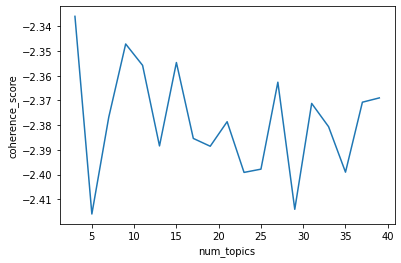

In [135]:
import seaborn as sns

ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

### Optimal number of topics: 10

## Run LDA Model again with Optimal N_Topics

In [136]:
lda = LdaMulticore(corpus=corpora,
                   id2word=id2word,
                   num_topics=10,
                   passes=200,
                   workers=5)

In [137]:
lda.print_topics()

[(0,
  '0.110*"use" + 0.074*"easy" + 0.051*"game" + 0.050*"tablet" + 0.045*"love" + 0.039*"great" + 0.032*"book" + 0.031*"play" + 0.030*"read" + 0.021*"watch"'),
 (1,
  '0.120*"love" + 0.079*"buy" + 0.072*"old" + 0.060*"year" + 0.040*"gift" + 0.036*"purchase" + 0.035*"tablet" + 0.029*"Christmas" + 0.027*"get" + 0.021*"daughter"'),
 (2,
  '0.077*"kid" + 0.048*"tablet" + 0.032*"great" + 0.032*"app" + 0.027*"child" + 0.021*"love" + 0.021*"time" + 0.018*"case" + 0.015*"control" + 0.013*"set"'),
 (3,
  '0.121*"work" + 0.043*"need" + 0.037*"far" + 0.026*"fine" + 0.021*"expect" + 0.021*"nice" + 0.020*"come" + 0.017*"box" + 0.016*"package" + 0.015*"time"'),
 (4,
  '0.051*"charge" + 0.024*"device" + 0.017*"Alexa" + 0.016*"home" + 0.016*"sound" + 0.014*"speaker" + 0.013*"time" + 0.012*"music" + 0.011*"tap" + 0.011*"like"'),
 (5,
  '0.079*"battery" + 0.021*"use" + 0.017*"Amazon" + 0.014*"buy" + 0.013*"remote" + 0.011*"day" + 0.010*"week" + 0.010*"month" + 0.010*"power" + 0.009*"go"'),
 (6,
  '0.0

In [138]:
words = [re.findall('"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t[0:5]) for t in words]
for id, t in enumerate(topics):
    print(f"----- Topic {id} -----")
    print(t, end="\n\n")

----- Topic 0 -----
use easy game tablet love

----- Topic 1 -----
love buy old year gift

----- Topic 2 -----
kid tablet great app child

----- Topic 3 -----
work need far fine expect

----- Topic 4 -----
charge device Alexa home sound

----- Topic 5 -----
battery use Amazon buy remote

----- Topic 6 -----
tablet Amazon app good screen

----- Topic 7 -----
Kindle read screen kindle book

----- Topic 8 -----
great good price product value

----- Topic 9 -----
battery long brand good price



In [139]:
# Topic Distance Visualization

import pyLDAvis.gensim

pyLDAvis.enable_notebook()

pyLDAvis.gensim.prepare(lda, corpora, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.098185  0.139353       1        1  13.164522
6      0.017120  0.005357       2        1  12.557274
9     -0.271180 -0.066454       3        1  11.950158
7      0.115667  0.026587       4        1  11.880481
2      0.148166 -0.048577       5        1  10.809359
0      0.238312 -0.122354       6        1   9.159348
1      0.208432 -0.042827       7        1   9.011982
8     -0.204748 -0.295932       8        1   8.910979
4      0.008346  0.251015       9        1   6.405234
3     -0.161931  0.153830      10        1   6.150665, topic_info=        Term         Freq        Total Category  logprob  loglift
3    battery  9665.000000  9665.000000  Default  30.0000  30.0000
21     great  8975.000000  8975.000000  Default  29.0000  29.0000
18     price  5070.000000  5070.000000  Default  28.0000  28.0000
10      work  4548.000000  4548.000000  Default  27.0000  27.0000
84      love  6087.000000  6087.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
144   pretty   112.617912   540.938843  Topic10  -5.1553   1.2193
241    issue   113.842758   573.235718  Topic10  -5.1445   1.1721
420    small   114.030418   662.047607  Topic10  -5.1428   1.0297
224     fast   110.507515   781.468750  Topic10  -5.1742   0.8325
32      good   112.913330  6776.607422  Topic10  -5.1527  -1.3060

[696 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
2398      2  0.919337      $
2398      4  0.080241      $
2665      2  0.981987    128
613       1  0.078241     16
613       2  0.801974     16
...     ...       ...    ...
97        7  0.755163   year
859       5  0.874819  young
859       7  0.122712  young
1086      5  0.084977     yr
1086      7  0.913500     yr

[1260 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 7, 10, 8, 3, 1, 2, 9, 5, 4])

## Findings

1. Selecting the number of topics seems similar to feature selection, with coherence scores serving a similar role as feature importance/permutation importances. Similar to the result of feature selection, selecting the number of topics via coherence scores definitely improved the model's performance. The main difference of course being that this model is not making predictions.

2. Despite not having direct predictive purpose, there's still some insights I think we get from this that are a bit different from the process of simply counting the most frequent words. For example, the most salient term in the last iteration was "battery," followed by "great." "Love" was also high on the list. This may indicate that customers are particularly pleased (or at least particularly *interested*) with the battery life of Amazon products included in this dataset.

3. Reviewing the data after applying the topic selection process also made the topics much more interpretable in my opinion, and certianly more meaningful. Compare the original Topic 0 ("tablet  Amazon app Fire $") with the final Topic 0 ("use easy game tablet love"). The latter gives us a couple adjectives and descriptive words, whereas the former tells us many things we already knew / don't care about. 

4. If I were working for Amazon, I'd likely want to hone in on Topic 9 more, as reviewing the most salient terms for this topic provide the following results: "work, need, far, find, expect." It also had very low saliency for terms like "great, long, good, easy, value." This could possibly indicate more customer dissatisfaction with products associated with the topic compared to the others.

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling